In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vidat import Vidat

In [2]:
DATESET_PATH = r"D:\dataset\ikea_action_dataset_video"

train_video_list = [
    "haodong",
    "jack",
    "liyuan",
    "reaching",
    "zheyu",
]

test_video_list = ["yicong"]

fps = 30
train_action_list = []
test_action_list = []

video_frame_list = []

for video in train_video_list:
    vidat = Vidat(os.path.join(DATESET_PATH, video, "annotations_sorted.json"))
    video_frame_list.append(vidat.annotation.video.frames)
    train_action_list.extend(vidat.annotation.actions)

for video in test_video_list:
    vidat = Vidat(os.path.join(DATESET_PATH, video, "annotations_sorted.json"))
    video_frame_list.append(vidat.annotation.video.frames)
    test_action_list.extend(vidat.annotation.actions)

action_list = train_action_list + test_action_list

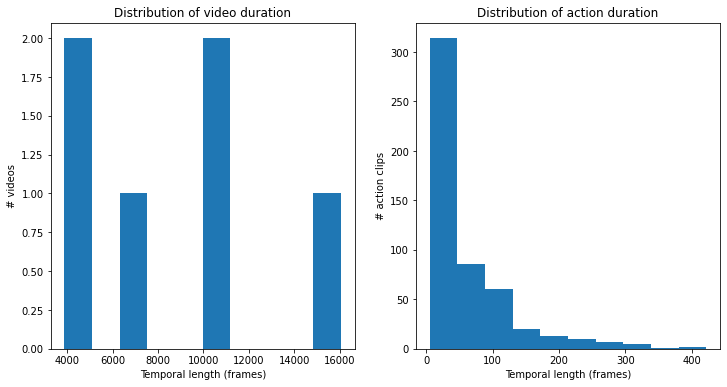

In [3]:
# Distribution of video duration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title("Distribution of video duration")
ax1.hist(video_frame_list)
ax1.set_xlabel("Temporal length (frames)")
ax1.set_ylabel("# videos")
# Distribution of video duration
action_duration_list = [int((action.end - action.start) * fps) for action in action_list]
ax2.set_title("Distribution of action duration")
ax2.hist(action_duration_list)
ax2.set_xlabel("Temporal length (frames)")
ax2.set_ylabel("# action clips")
fig.savefig("Figure1.svg")

In [4]:
# Actions train/test distribution
train_data = {}
for action in train_action_list:
    if action.action_id in train_data:
        train_data[action.action_id] += 1
    else:
        train_data[action.action_id] = 1
test_data = {}
for action in test_action_list:
    if action.action_id in test_data:
        test_data[action.action_id] += 1
    else:
        test_data[action.action_id] = 1

In [5]:
df = pd.DataFrame({"train": train_data, "test": test_data})
df.sort_values("train", inplace=True)
df

,train,test
7,15,9
2,16,9
8,17,5
3,21,6
4,22,13
5,39,21
6,53,28
1,100,21
9,101,22


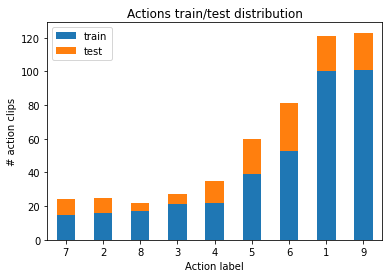

In [6]:
ax = df.plot.bar(
    stacked=True, rot=0, xlabel="Action label", ylabel="# action clips", title="Actions train/test distribution"
)
ax.figure.savefig("Figure2.svg")